In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier


In [11]:
df=pd.read_csv('olist_order_items_dataset.csv')
df['shipping_limit_date']=pd.to_datetime(df['shipping_limit_date'])

## Data details

In [12]:
df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
25965,3b070195d0d1272935abef5e1dcf0c9e,1,80ec2c3e9b6567d1b32714e79282d57f,1835b56ce799e6a4dc4eddc053f04066,2018-06-20 12:58:39,49.99,13.93
55680,7e9eac6236b24f54d858badd77aa172c,1,41cd333a4af5e36df81fc0b83ccf8e2d,5dceca129747e92ff8ef7a997dc4f8ca,2017-11-07 18:07:02,388.00,40.47
109969,f9e98373f57d893a7116ef7a0bb0cc39,1,7cd29da0653abeb444703cc5a957f479,620c87c171fb2a6dd6e8bb4dec959fc6,2017-06-08 13:30:15,37.90,15.10
59338,8739393fd79da12b068ac63a98eea9e0,1,3dd2a17168ec895c781a9191c1e95ad7,de722cd6dad950a92b7d4f82673f8833,2018-01-18 18:29:00,149.90,23.37
3647,0849024969adbd058756b6d843f3c1c5,1,17da5d80ea0eeabd565083183027d588,e9779976487b77c6d4ac45f75ec7afe9,2017-12-21 21:13:47,51.49,16.12


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [14]:
df.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [22]:
df.describe()

,order_item_id,shipping_limit_date,price,freight_value
count,112650.000000,112650,112650.000000,112650.000000
mean,1.197834,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,1.000000,2016-09-19 00:15:34,0.850000,0.000000
25%,1.000000,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,1.000000,2018-01-26 13:59:35,74.990000,16.260000
75%,1.000000,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,21.000000,2020-04-09 22:35:08,6735.000000,409.680000
std,0.705124,NaN,183.633928,15.806405


## Analysis

<Axes: xlabel='order_item_id'>

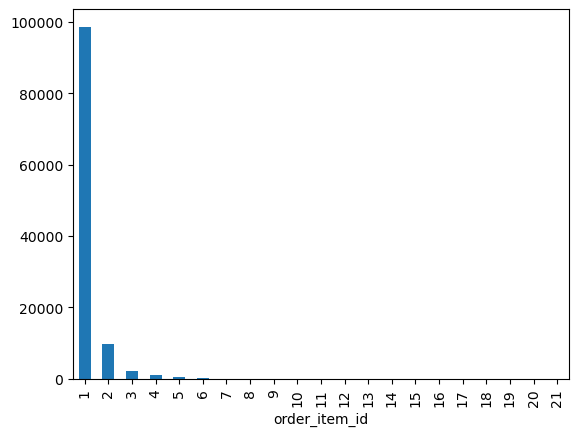

In [17]:
df['order_item_id'].value_counts().plot(kind='bar')

In [16]:
df['order_item_id'].value_counts()

order_item_id
1     98666
2      9803
3      2287
4       965
5       460
6       256
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
16        3
17        3
18        3
19        3
20        3
21        1
Name: count, dtype: int64

<Axes: ylabel='freight_value'>

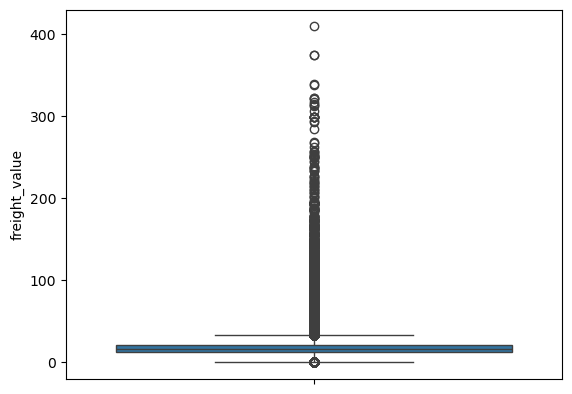

In [18]:
sns.boxplot(df['freight_value'])

<Axes: ylabel='price'>

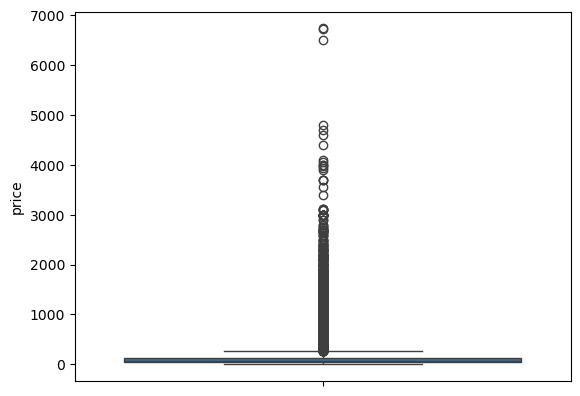

In [19]:
sns.boxplot(df['price'])

<Axes: xlabel='price', ylabel='freight_value'>

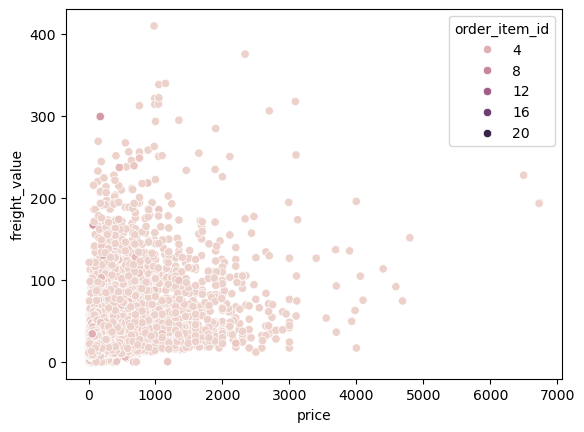

In [21]:
sns.scatterplot(data=df,x='price',y='freight_value',hue='order_item_id')

## There are alot of outliers in the data